In [116]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
import os
%matplotlib inline

In [15]:
img = cv2.imread('data/processed_data/12-10-top.png')
assert img is not None

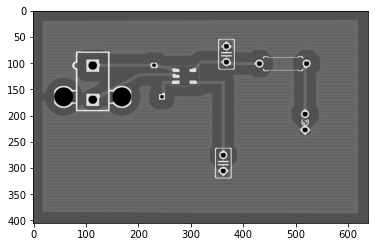

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
plt.imshow(gray, cmap='gray')

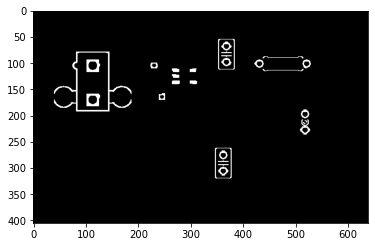

In [17]:
ret, thresh = cv2.threshold(gray, 0, 255, 
#                             cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU) 
plt.imshow(thresh, cmap='gray')

In [18]:
# constructing pipeline

def get_threshold_gray_img(input_file):
    img = cv2.imread(input_file)
    assert img is not None
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU) 
    return thresh

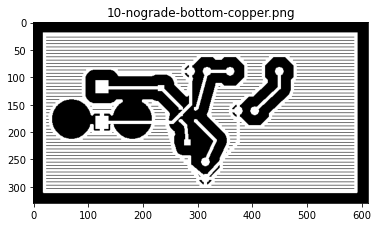

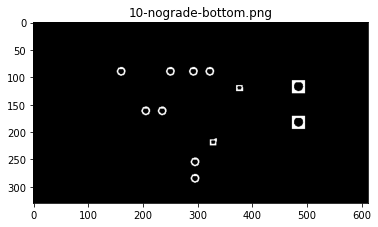

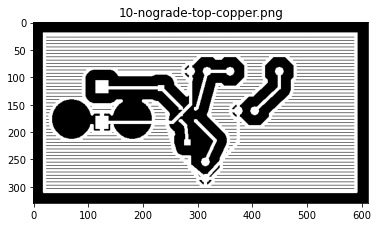

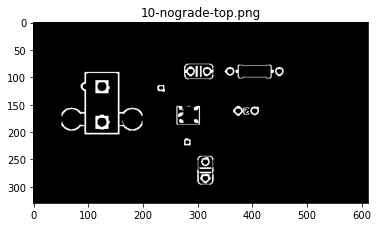

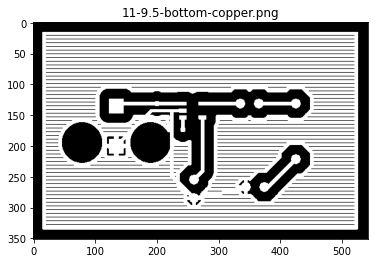

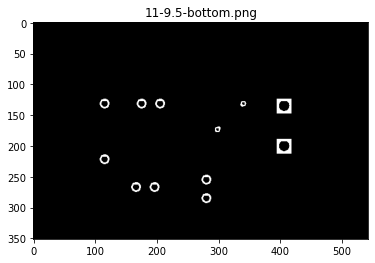

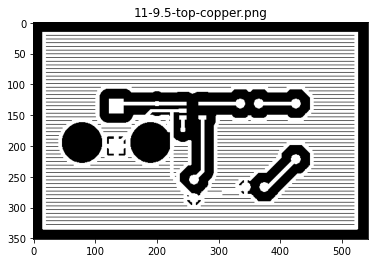

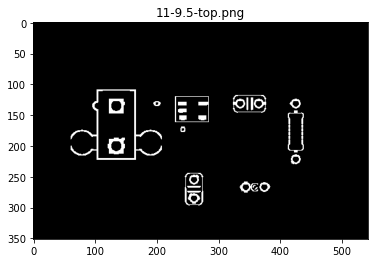

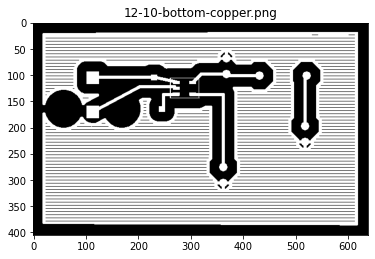

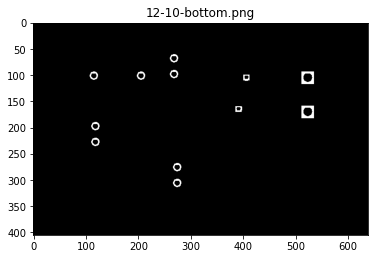

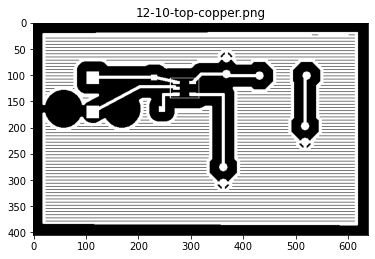

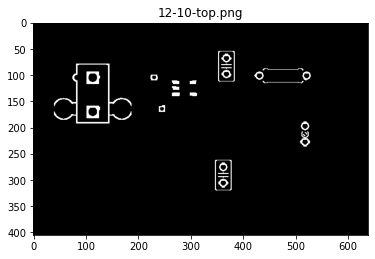

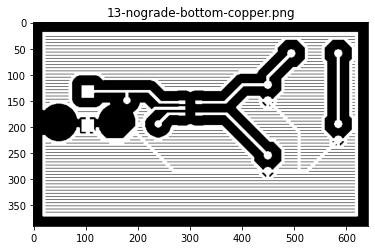

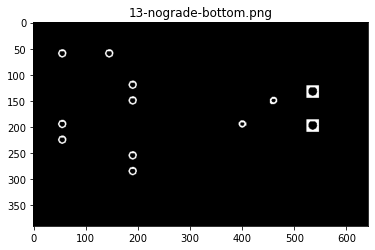

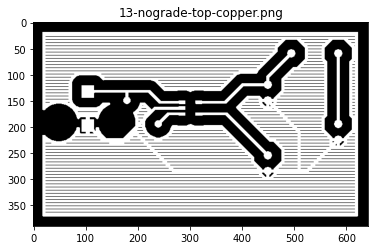

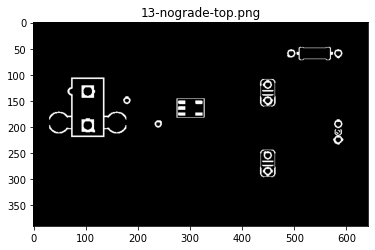

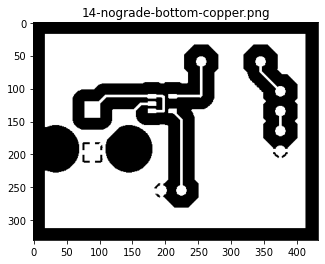

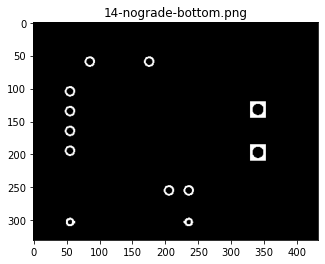

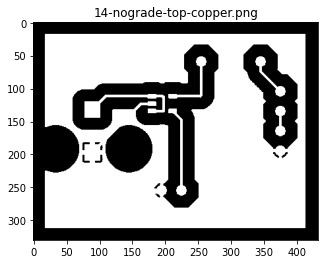

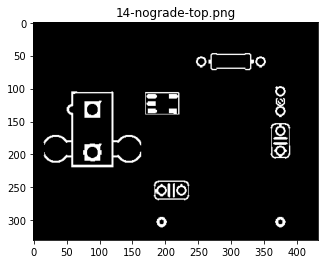

In [19]:
for f in os.listdir('data/processed_data')[:20]:
    plt.figure()
    plt.title(f)
    thresh = get_threshold_gray_img('data/processed_data/'+f)
    plt.imshow(thresh, cmap='gray')

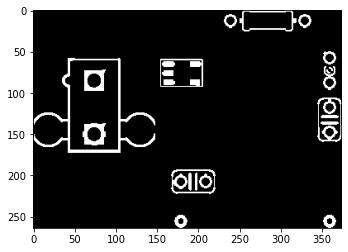

In [95]:
component_diagram = get_threshold_gray_img('data/processed_data/14-nograde-top.png')
def crop(diagram):
    start_row, start_col, end_row, end_col = 0, 0, len(diagram)-1, len(diagram[0])-1
    while np.sum(diagram[start_row]) == 0:
        start_row += 1
        if start_row == len(diagram):
            return None, None
        
    while np.sum(diagram[:, start_col]) == 0:
        start_col += 1
    while np.sum(diagram[end_row]) == 0:
        end_row -= 1
    while np.sum(diagram[:, end_col]) == 0:
        end_col -= 1
    return diagram[start_row:end_row+1, start_col:end_col+1], [start_row, start_col]
        
cropped_diagram, offsets = crop(component_diagram)
plt.imshow(cropped_diagram, cmap='gray')

In [96]:
# plt.imshow(cropped_diagram[58:173, :148])

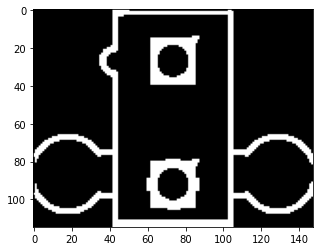

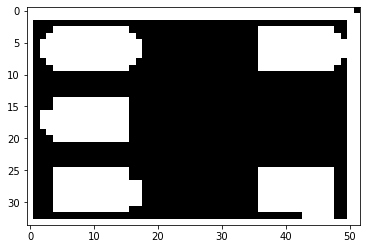

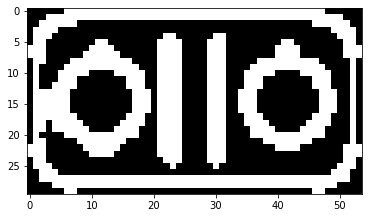

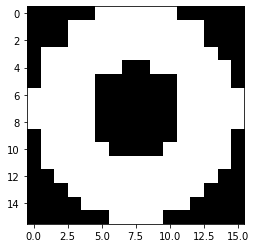

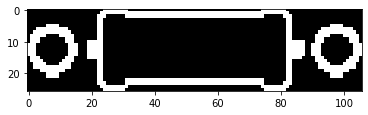

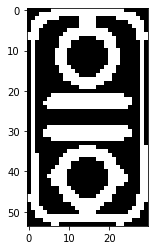

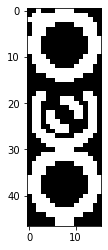

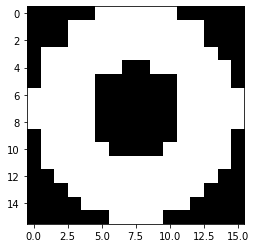

In [97]:
def get_next_boundary_component(img, debug=False):
    m, n = img.shape
    visited = set()
    all_boundary_ixs = []
    all_boundary_ixs += [(i, 0) for i in range(m)]
    all_boundary_ixs += [(i, n-1) for i in range(m)]
    all_boundary_ixs += [(0, j) for j in range(n)]
    all_boundary_ixs += [(m-1, j) for j in range(n)]
    start_ix = next(ix for ix in all_boundary_ixs if img[ix[0], ix[1]] > 0)
    
    
    queue = []
    queue.append(start_ix)
    visited.add(start_ix)
    while queue:
        i, j = queue.pop()
        for diff in range(6):
            for (ni, nj) in [(i+diff, j), (i-diff, j), (i, j-diff), (i, j+diff)]:
                if ni < 0 or nj < 0 or ni >= m or nj >= n:
                    continue
                if (ni, nj) in visited or img[ni, nj] == 0:
                    continue
                visited.add((ni, nj))
                queue.append((ni, nj))
    
    
    start_row = min(x[0] for x in visited)
    end_row = max(x[0] for x in visited)
    start_col = min(x[1] for x in visited)
    end_col = max(x[1] for x in visited)
    if debug:
        plt.figure()
        plt.imshow(img[start_row:end_row+1, start_col:end_col+1], cmap='gray')
        
    res = np.array(img[start_row:end_row+1, start_col:end_col+1])
    img[start_row:end_row+1, start_col:end_col+1] = 0
    return res

components = []
while cropped_diagram is not None:
    components.append(get_next_boundary_component(cropped_diagram, debug=True))
    cropped_diagram = crop(cropped_diagram)[0]

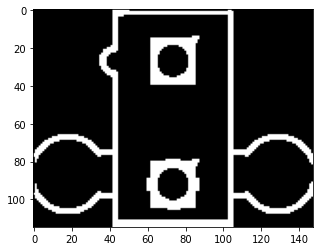

In [110]:
plt.imshow(components[0], cmap='gray')
np.save('./data/components/power_supply', components[0])

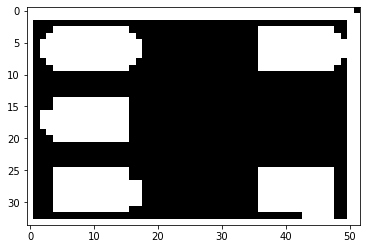

In [111]:
plt.imshow(components[1], cmap='gray')
np.save('./data/components/regulation', components[1])

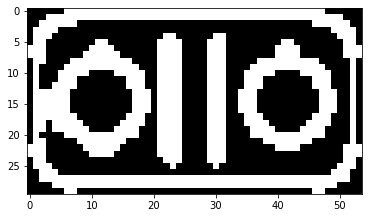

In [112]:
plt.imshow(components[2], cmap='gray')
np.save('./data/components/capacitance', components[2])

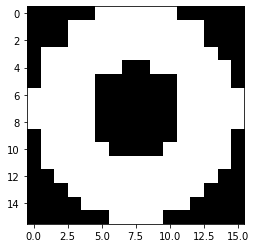

In [113]:
plt.imshow(components[3], cmap='gray')
np.save('./data/components/pin1', components[3])

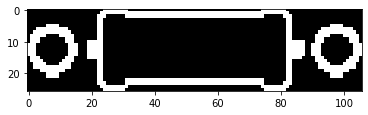

In [114]:
plt.imshow(components[4], cmap='gray')
np.save('./data/components/resistance', components[4])

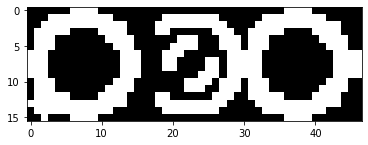

In [120]:
rotatedLED = np.rot90(components[6])
plt.imshow(rotatedLED, cmap='gray')
np.save('./data/components/LED', rotatedLED)